In [1]:
import pandas as pd

dev = True  # Set to false when using production version of library
if dev:
    # Path to Dev version of autots library
    sys.path.append(os.environ['DEV_AUTOTS'])
    %load_ext autoreload
    %autoreload 2

from auto_ts import auto_timeseries as ATS

Imported auto_timeseries version:0.0.25. Call by using:

ats = auto_timeseries(score_type='rmse', forecast_period=forecast_period,
                time_interval='Month',
                non_seasonal_pdq=None, seasonality=False, seasonal_period=12,
                model_type=['Prophet'],
                verbose=2)
ats.fit(traindata, ts_column,target)
ats.predict(testdata, forecast_period)



# Load Dataset

In [2]:
datapath = '../example_datasets/'
filename1 = 'Sales_and_Marketing.csv'
dataset = pd.read_csv(datapath+filename1, index_col=None)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Time Period        48 non-null     object 
 1   Sales              48 non-null     int64  
 2   Marketing Expense  48 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.2+ KB


In [3]:
dataset.head()

,Time Period,Sales,Marketing Expense
0,2011-01-01,397,486.64
1,2011-02-01,400,501.80
2,2011-03-01,498,437.09
3,2011-04-01,536,565.16
4,2011-05-01,596,744.15


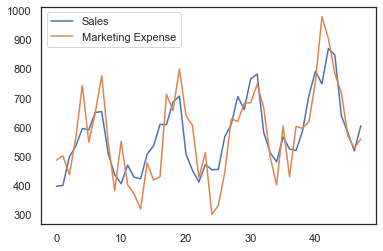

In [4]:
dataset[['Sales', 'Marketing Expense']].plot()

# Train Model

In [5]:
ts_column = 'Time Period'
target = 'Sales'
sep = ','

In [6]:
FORECAST_PERIOD = 3

In [7]:
train = dataset[:-FORECAST_PERIOD]
test = dataset[-FORECAST_PERIOD:]
print(train.shape, test.shape)

(45, 3) (3, 3)


In [8]:
automl_model = ATS(
    score_type='rmse',
    forecast_period=FORECAST_PERIOD,
    model_type='best', verbose=0
)        

In [9]:
automl_model.fit(
    traindata=train,
    ts_column=ts_column,
    target=target,
    cv=3,
    sep=sep)        

Start of Fit.....
    Target variable = Sales
Start of loading of data.....
Input is data frame. Performing Time Series Analysis
ts_column: Time Period sep: , target: Sales
    Dataframe loaded successfully. Shape of data set = (45, 2)
Time Interval of obserations has not been provided. Program will try to figure this out now...
Time series input in days = 31
It is a Monthly time series.


Building Prophet Model



Running Facebook Prophet Model...
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
  Starting Prophet Fit
  End of Prophet Fit
  Starting Prophet Cross Validation
  End of Prophet Cross Validation
    RMSE = 80.21
    Std Deviation of Originals = 126.24
    Normalized RMSE = 64%
    RMSE = 47.00
    Std Deviation of Originals = 126.24
    Normalized RMSE = 37%


Building Auto SARIMAX Model



Running Auto SARIMAX Model...
Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=True]; AIC=516.877, BIC=520.446, Time=0.016 seconds
Fit ARIMA(1,1,0)x(0

# Evaluate Results

In [10]:
automl_model.get_leaderboard()

,name,rmse
0,Prophet,63.603252
3,ML,74.847572
1,auto_SARIMAX,89.835589
2,VAR,150.557138


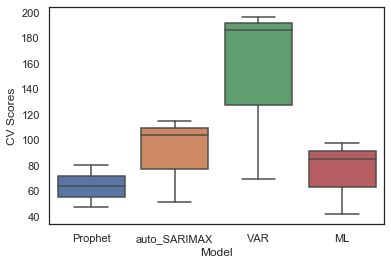

In [11]:
automl_model.plot_cv_scores()

In [12]:
# There is a Bug with Prophet folds: https://github.com/AutoViML/Auto_TS/issues/25
automl_model.get_cv_scores()

,Model,CV Scores
0,Prophet,80.206656
1,Prophet,46.999848
2,auto_SARIMAX,50.907085
3,auto_SARIMAX,104.046646
4,auto_SARIMAX,114.553037
5,VAR,69.094593
6,VAR,186.138457
7,VAR,196.438365
8,ML,41.597362
9,ML,85.084925


In [13]:
results_dict = automl_model.get_ml_dict()

In [14]:
results_dict['Prophet']['forecast'] 

[           ds        yhat  yhat_lower  yhat_upper    y     cutoff
 0  2013-02-01  439.757354  435.375766  443.519640  455 2013-01-30
 1  2013-03-01  508.478781  497.355316  519.692163  568 2013-01-30
 2  2013-04-01  555.686954  535.028371  576.497827  610 2013-01-30
 3  2013-05-01  616.094882  584.895045  646.733024  706 2013-01-30
 4  2013-06-01  608.546590  565.433973  654.286201  661 2013-01-30
 5  2013-07-01  678.910041  621.330008  740.225797  767 2013-01-30
 6  2013-08-01  684.047396  610.271064  760.436691  783 2013-01-30
 7  2013-09-01  514.731335  420.859227  606.887919  583 2013-01-30
 8  2013-10-01  442.612977  334.311246  549.999397  513 2013-01-30
 9  2013-11-01  400.953838  275.085946  529.846942  481 2013-01-30
 10 2013-12-01  480.415339  342.741733  627.059308  567 2013-01-30
 11 2014-01-01  449.482216  293.438284  613.723871  525 2013-01-30
 12 2014-02-01  455.125208  282.149048  637.094167  520 2013-01-30
 13 2014-03-01  530.672578  338.143265  728.694694  587 2013-0

In [15]:
results_dict['auto_SARIMAX']['forecast']

[Sales             mean    mean_se  mean_ci_lower  mean_ci_upper
 2014-01-01  527.225025  60.287731     409.063243     645.386807
 2014-02-01  604.676884  68.843789     469.745537     739.608231
 2014-03-01  611.484045  71.404777     471.533254     751.434837,
 Sales             mean    mean_se  mean_ci_lower  mean_ci_upper
 2014-04-01  600.105124  59.253756     483.969896     716.240352
 2014-05-01  651.392010  67.986443     518.141030     784.642989
 2014-06-01  730.361145  70.676712     591.837335     868.884955,
 Sales             mean    mean_se  mean_ci_lower  mean_ci_upper
 2014-07-01  739.661436  61.241803     619.629707     859.693165
 2014-08-01  711.496859  70.202701     573.902093     849.091624
 2014-09-01  699.027694  72.936411     556.074955     841.980433]

In [16]:
results_dict['VAR']['forecast'] 

[Sales             mean    mean_se  mean_ci_lower  mean_ci_upper
 2014-01-01  595.621989  61.490180     475.103451     716.140526
 2014-02-01  614.799780  80.839084     456.358086     773.241474
 2014-03-01  605.647376  91.787511     425.747160     785.547592,
 Sales             mean    mean_se  mean_ci_lower  mean_ci_upper
 2014-04-01  578.143142  63.282444     454.111830     702.174454
 2014-05-01  568.947414  81.707189     408.804267     729.090562
 2014-06-01  558.325452  90.764160     380.430967     736.219938,
 Sales             mean    mean_se  mean_ci_lower  mean_ci_upper
 2014-07-01  675.220756  64.456905     548.887543     801.553968
 2014-08-01  592.925592  88.501667     419.465511     766.385673
 2014-09-01  528.772183  99.856099     333.057826     724.486540]

In [17]:
results_dict['ML']['forecast'] # This has CV implemented, but currently does not return the forecast values from the CV (maybe a future enhancement)

[]

# Forecast Results

In [18]:
# Actual Test
test

,Time Period,Sales,Marketing Expense
45,2014-10-01,581,570.30
46,2014-11-01,519,527.60
47,2014-12-01,605,559.75


In [19]:
# Using Best Model
future_predictions = automl_model.predict(
    testdata=test.drop(columns=target),
    forecast_period=FORECAST_PERIOD
)  
future_predictions

Building Forecast dataframe. Forecast Period = 3


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Marketing Expense,Marketing Expense_lower,Marketing Expense_upper,additive_terms,...,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-10-01,689.914384,573.444593,629.391919,689.687253,690.137333,-0.207675,-0.207675,-0.207675,-88.592296,...,-0.207675,-0.207675,-0.207675,-88.384621,-88.384621,-88.384621,0.0,0.0,0.0,601.322088
1,2014-11-01,696.096979,539.612904,595.065852,695.492575,696.737196,-1.472682,-1.472682,-1.472682,-128.710073,...,-1.472682,-1.472682,-1.472682,-127.237391,-127.237391,-127.237391,0.0,0.0,0.0,567.386906
2,2014-12-01,702.080136,612.398312,667.783862,700.807335,703.232398,-0.520223,-0.520223,-0.520223,-61.923930,...,-0.520223,-0.520223,-0.520223,-61.403706,-61.403706,-61.403706,0.0,0.0,0.0,640.156206


In [20]:
# Using specific model
future_predictions = automl_model.predict(
    testdata=test.drop(columns=target),
    forecast_period=FORECAST_PERIOD,
    model='Prophet'
)
future_predictions

Building Forecast dataframe. Forecast Period = 3


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Marketing Expense,Marketing Expense_lower,Marketing Expense_upper,additive_terms,...,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-10-01,689.914384,571.713089,627.715599,689.658755,690.122342,-0.207675,-0.207675,-0.207675,-88.592296,...,-0.207675,-0.207675,-0.207675,-88.384621,-88.384621,-88.384621,0.0,0.0,0.0,601.322088
1,2014-11-01,696.096979,539.652420,594.438980,695.420023,696.733432,-1.472682,-1.472682,-1.472682,-128.710073,...,-1.472682,-1.472682,-1.472682,-127.237391,-127.237391,-127.237391,0.0,0.0,0.0,567.386906
2,2014-12-01,702.080136,611.901484,665.445808,700.870453,703.336265,-0.520223,-0.520223,-0.520223,-61.923930,...,-0.520223,-0.520223,-0.520223,-61.403706,-61.403706,-61.403706,0.0,0.0,0.0,640.156206


In [21]:
# Using specific model
future_predictions = automl_model.predict(
    testdata=test.drop(columns=target),
    forecast_period=FORECAST_PERIOD,
    model='auto_SARIMAX'
)
future_predictions

Sales,mean,mean_se,mean_ci_lower,mean_ci_upper
2014-10-01,632.090365,66.045245,502.644062,761.536667
2014-11-01,638.980028,71.476275,498.889103,779.070952
2014-12-01,665.157002,72.481310,523.096244,807.217760


In [22]:
# Using specific model
future_predictions = automl_model.predict(
    testdata=test.drop(columns=target),
    forecast_period=FORECAST_PERIOD,
    model='ML'
)
future_predictions

,mean,mean_se,mean_ci_lower,mean_ci_upper
Time Period,,,,
2014-10-01,523.6,NaN,NaN,NaN
2014-11-01,513.0,NaN,NaN,NaN
2014-12-01,522.9,NaN,NaN,NaN


In [23]:
# Using specific model
future_predictions = automl_model.predict(
    # X_exogen=test.drop(columns=target), # This can be specified but will be ignored for VAR
    forecast_period=FORECAST_PERIOD,
    model='VAR'
)
future_predictions

Sales,mean,mean_se,mean_ci_lower,mean_ci_upper
2014-10-01,545.770852,69.227485,410.087474,681.454230
2014-11-01,494.253700,93.651833,310.699480,677.807919
2014-12-01,466.351998,107.392814,255.865950,676.838047
